# Road Rage
This is a traffic simulator designed to find the best speed limit that allows for the fewest traffic jams, and therefore higher average speeds for drivers. Our simulated drivers are similar to real drivers in that they sometimes randomly slow down (10% chance per second of a 2 m/s slowdown), and they like to keep a reasonable distance between themselves and the car in front of them (Their speed in m/s in meters between the car in front of them).

Based on the data I collected. The highest average speed obtained over a thousand trials was 69.72 k/h when the max speed allowed was 72 k/h.

Interestingly enough, when the max speed was 90 k/h, the average speed was only 58 k/h, attributed to more time spent stopping and going in bigger traffic jams. When the speed limit was lower, the average speeds were very close to the posted or sometimes slightly higher! While the speeds were corrected to go back to the posted limit if their current speeds exceeded it, there were also virtually no traffic jams at these lower speeds, so it seems likely that they had a slight amount of trouble keeping to this slower limit.

Based on this data, the posted speed limit should be 72 k/h. This is one standard deviation or 2.75 k/h, higher than the mean speed of 69.72 k/h.


In [2]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
from traffic_lib import *

In [3]:
%matplotlib inline


In [4]:
sim = Sim()

def convert_k(x):
    return x*3.6

def run_trials(n):
    avg_speeds = []
    for x in range(n):
        avg_speeds.append(convert_k(sim.run()[1]))
    return avg_speeds



In [5]:
road_data = sim.run(60)[0]
avg_speed = run_trials(1000)

The average speed per car over 1000 trials at a max speed of 60 k/h is 63.24 k/h


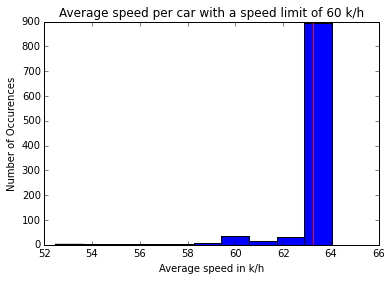

In [6]:
avg = st.mean(avg_speed)
print("The average speed per car over 1000 trials at a max speed of 60 k/h is {} k/h".format(round(avg, 2)))
plt.hist(avg_speed)
ymin, ymax = plt.ylim()
plt.vlines(avg, ymin, ymax, color='red')
plt.title("Average speed per car with a speed limit of 60 k/h")
plt.xlabel("Average speed in k/h")
plt.ylabel("Number of Occurences")
plt.show()

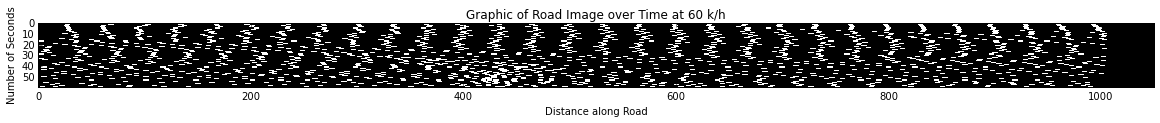

In [7]:
img_data = road_data.astype('float32')

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(img_data, cmap='bone', interpolation='nearest')
plt.title("Graphic of Road Image over Time at 60 k/h")
plt.ylabel("Number of Seconds")
plt.xlabel("Distance along Road")
plt.show()

In [4]:
road_data = sim.run(60)[0]
avg_speed = run_trials(1000)

The average speed per car over 1000 trials at a max speed of 72 k/h is 69.72 k/h
The stand deviation in the data set was 2.741253826963097


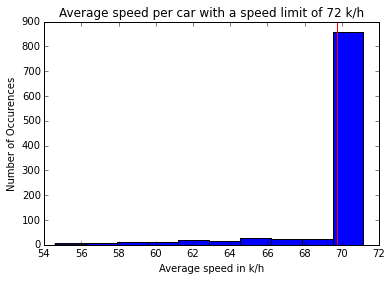

In [6]:
avg = st.mean(avg_speed)
std = st.stdev(avg_speed)
print("The average speed per car over 1000 trials at a max speed of 72 k/h is {} k/h".format(round(avg, 2)))
print("The stand deviation in the data set was {}".format(std))
plt.hist(avg_speed)
ymin, ymax = plt.ylim()
plt.vlines(avg, ymin, ymax, color='red')
plt.title("Average speed per car with a speed limit of 72 k/h")
plt.xlabel("Average speed in k/h")
plt.ylabel("Number of Occurences")
plt.show()

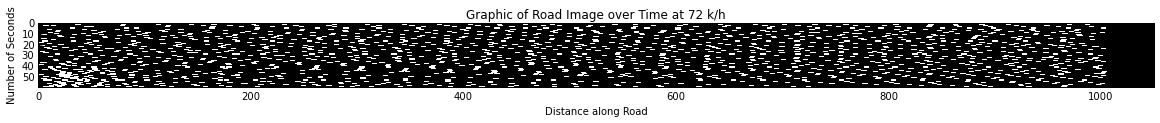

In [7]:
img_data = road_data.astype('float32')

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(img_data, cmap='bone', interpolation='nearest')
plt.title("Graphic of Road Image over Time at 72 k/h")
plt.ylabel("Number of Seconds")
plt.xlabel("Distance along Road")
plt.show()

In [6]:
road_data = sim.run(60)[0]
avg_speed = run_trials(1000)

The average speed per car over 1000 trials at a max speed of 90 k/h is 57.91 k/h


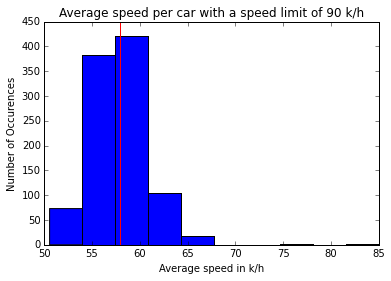

In [7]:
avg = st.mean(avg_speed)
print("The average speed per car over 1000 trials at a max speed of 90 k/h is {} k/h".format(round(avg, 2)))
plt.hist(avg_speed)
ymin, ymax = plt.ylim()
plt.vlines(avg, ymin, ymax, color='red')
plt.title("Average speed per car with a speed limit of 90 k/h")
plt.xlabel("Average speed in k/h")
plt.ylabel("Number of Occurences")
plt.show()

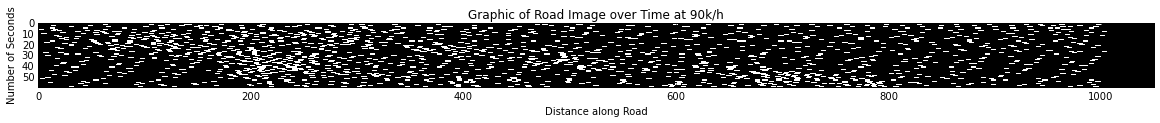

In [8]:
img_data = road_data.astype('float32')

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(img_data, cmap='bone', interpolation='nearest')
plt.title("Graphic of Road Image over Time at 90k/h")
plt.ylabel("Number of Seconds")
plt.xlabel("Distance along Road")
plt.show()